# Presentación Final

In [15]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mexico_covid19.csv')

df.head(2)

,id,FECHA_ARCHIVO,ENTIDAD_UM,ENTIDAD_RES,RESULTADO,DELAY,ENTIDAD_REGISTRO,ENTIDAD,ABR_ENT,ORIGEN,...,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,DIABETES,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD
0,9269,12/04/20,25,25,2,0,25,Sinaloa,SL,2,...,97,2,74,1,1,2,2,1,2,1
1,33333,12/04/20,14,14,2,0,14,Jalisco,JC,1,...,2,2,71,1,1,2,2,1,2,1


In [3]:
df.shape

(261825, 25)

In [4]:
df.columns

Index(['id', 'FECHA_ARCHIVO', 'ENTIDAD_UM', 'ENTIDAD_RES', 'RESULTADO',
       'DELAY', 'ENTIDAD_REGISTRO', 'ENTIDAD', 'ABR_ENT', 'ORIGEN', 'SEXO',
       'ENTIDAD_NAC', 'MUNICIPIO_RES', 'FECHA_INGRESO', 'FECHA_SINTOMAS',
       'INTUBADO', 'NEUMONIA', 'EDAD', 'NACIONALIDAD', 'DIABETES', 'ASMA',
       'INMUSUPR', 'HIPERTENSION', 'CARDIOVASCULAR', 'OBESIDAD'],
      dtype='object')

# Limpieza de Datos

## Preguntas guia
¿Qué estado del norte tiene más casos COVID19?

¿Cual es la edad más común de personas contagiadas de COVID19?

In [11]:
df.drop(['ENTIDAD_UM','ENTIDAD_RES','ORIGEN','NACIONALIDAD'], axis=1, inplace=True)

estados_Norte = ['Nuevo Leon','Coahuila','Sonora','Tamaulipas','Chihuahua','Baja California']

df_1 = df[df.ENTIDAD.str.contains('|'.join(estados_Norte))]
df_1.ENTIDAD.unique()

array(['Chihuahua', 'Nuevo Leon', 'Coahuila', 'Tamaulipas',
       'Baja California', 'Baja California Sur', 'Sonora'], dtype=object)

In [12]:
df_1.shape

(48386, 21)

In [13]:
df_1.head(3)

,id,FECHA_ARCHIVO,RESULTADO,DELAY,ENTIDAD_REGISTRO,ENTIDAD,ABR_ENT,SEXO,ENTIDAD_NAC,MUNICIPIO_RES,...,FECHA_SINTOMAS,INTUBADO,NEUMONIA,EDAD,DIABETES,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD
2,35483,12/04/20,1,0,8,Chihuahua,CH,2,8,19.0,...,24/03/20,2,1,50,2,2,2,2,2,2
5,5019,12/04/20,2,0,19,Nuevo Leon,NL,2,19,39.0,...,24/03/20,97,2,67,2,2,2,1,2,1
8,4265,12/04/20,2,0,19,Nuevo Leon,NL,1,25,39.0,...,29/03/20,97,2,30,2,2,2,2,2,2


# Graficas

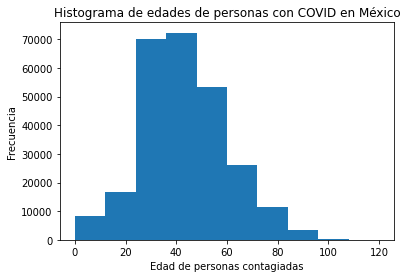

In [10]:
plt.hist(x = df['EDAD'])


plt.title('Histograma de edades de personas con COVID en México')
plt.xlabel('Edad de personas contagiadas')
plt.ylabel('Frecuencia')
plt.show()

En el histograma anterior podemos observar que la edad más comun para las personas contagiadas de COVID19 en el país es de 40 a 50 años. Con esta grafica podemos contestar la segunda pregunta guía: ¿Cual es la edad más común de personas contagiadas de COVID19?

In [8]:
casos = pd.pivot_table(df_1,
                      columns = ['ENTIDAD'],
                      aggfunc = 'size')

casos

ENTIDAD
Baja California         8871
Baja California Sur     2298
Chihuahua               3881
Coahuila                7548
Nuevo Leon             12791
Sonora                  5301
Tamaulipas              7696
dtype: int64

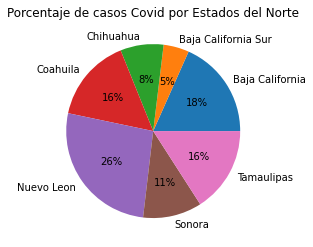

In [14]:
EstadosF = ['Baja California','Baja California Sur','Chihuahua',
            'Coahuila','Nuevo Leon','Sonora','Tamaulipas']

plt.pie(casos, 
        labels = EstadosF,
        autopct = '%.0F%%')

plt.title('Porcentaje de casos Covid por Estados del Norte')
plt.show()

En la grafica anterior podemos ver Nuevo Leon es el estado del norte que tiene el mayor numero de casos covid, Baja California siendo el segundo lugar en casos y Baja California Sur teniendo el menor numero de casos de estos Estados. Esto nos ayuda a contestar la pregunta guía: ¿Qué estado del norte tiene más casos COVID19?

In [18]:
estados_Norte = ['Nuevo Leon']

df_2 = df[df.ENTIDAD.str.contains('|'.join(estados_Norte))]
df_2.ENTIDAD.unique()

array(['Nuevo Leon'], dtype=object)

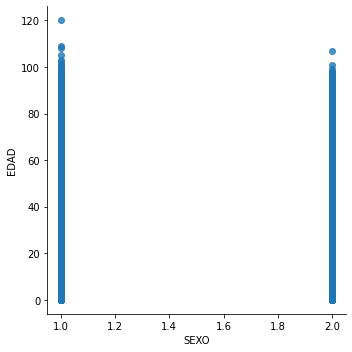

In [19]:
sns.lmplot(x='', 
           y='EDAD',
           hue='SEXO',
           markers=['x', 'o']
           fit_reg=False, 
           data=df_2)